In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('ml_project1_data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


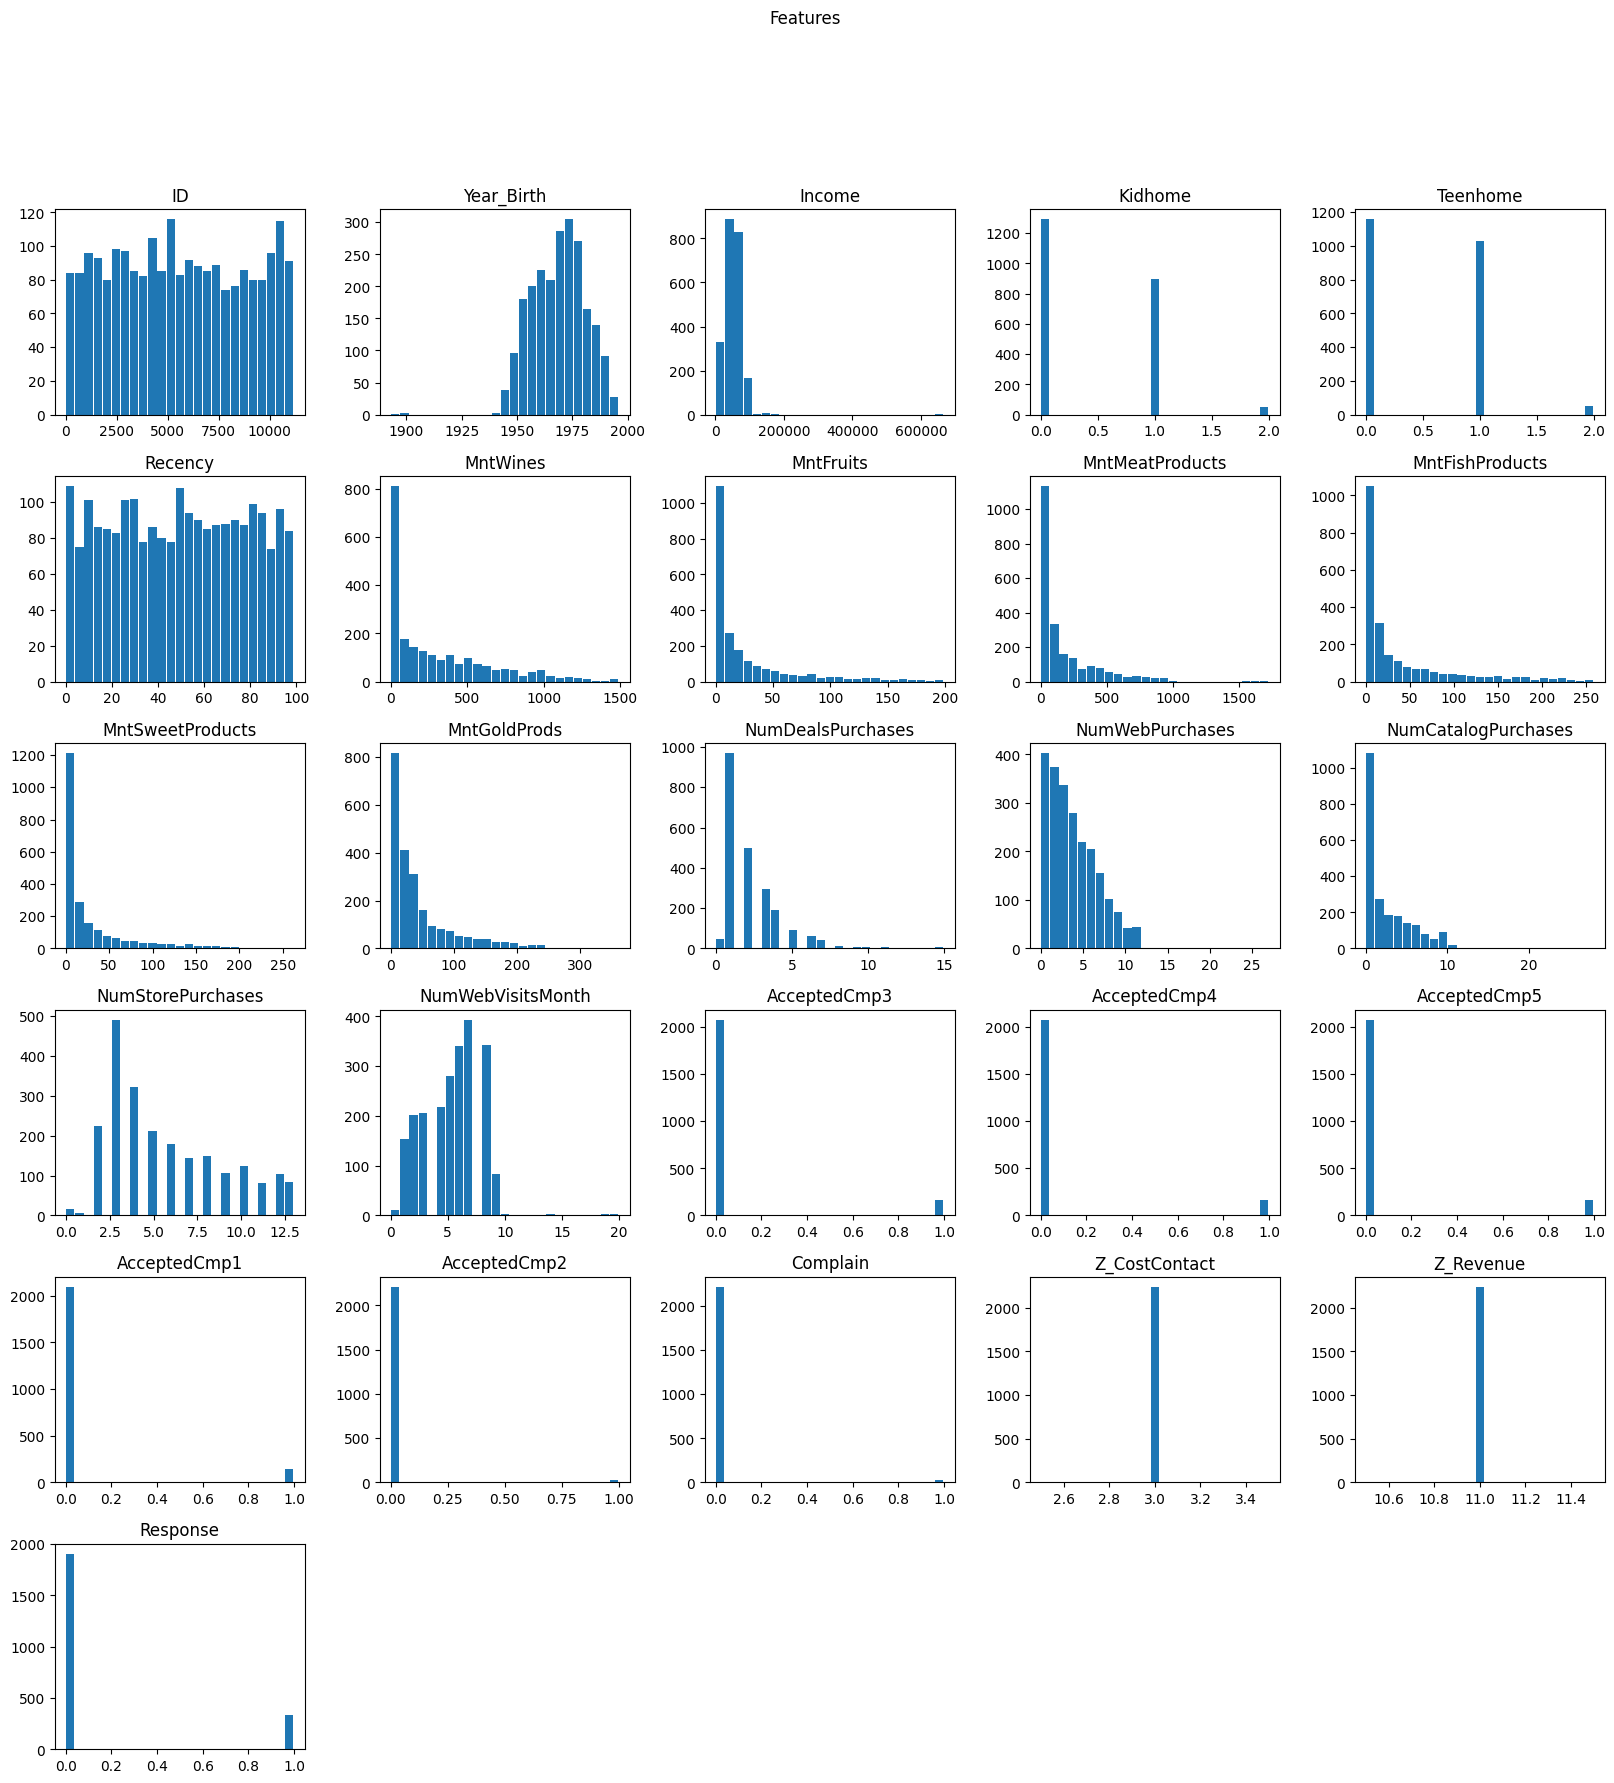

In [7]:
ax = df.hist(bins=25, grid=False, figsize=(20,20), zorder=2, rwidth=0.9)
plt.suptitle("Features")
plt.show()

In [28]:
def check_missing_values(df):
    """
    Identifica as colunas com valores nulos em um DataFrame.

    Parâmetros:
        df (pd.DataFrame): O DataFrame a ser analisado.

    Retorna:
        pd.DataFrame: Tabela com as colunas que possuem valores nulos,
                      o número total de valores nulos e a porcentagem.
    """
    print(" ============== Resumo de Valores Nulos ============== ")
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Coluna': df.columns,
        'Valores Nulos': missing_data,
        'Porcentagem (%)': missing_percentage
    })
    return missing_summary[missing_summary['Valores Nulos'] > 0].reset_index(drop=True)

In [30]:
def outliers_column_summary(df, column, factor=1.5):
    """
    Identifica e exibe informações sobre outliers em uma coluna de um DataFrame.

    Parâmetros:
        df (pd.DataFrame): O DataFrame a ser analisado.
        column (str): O nome da coluna em que serão detectados os outliers.
        factor (float, opcional): O fator multiplicador do IQR para definir os limites dos outliers (padrão: 1.5).

    Retorna:
        pd.Series: Série contendo os valores considerados outliers.
    """
    print(" ============== Resumo de Outliers ============== ")
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - factor * IQR)
    upper_bound = Q3 + factor * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    total_rows = len(df)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_rows) * 100
    
    print(f"Valores outliers para a coluna '{column}':")
    print(outliers.tolist())
    print(f"\nNúmero de outliers: {num_outliers}")
    print(f"Porcentagem de outliers: {percentage_outliers:.2f}%")
    
    return outliers


In [29]:
missing_summary = check_missing_values(df)
print(missing_summary)


 ============== Resumo de Valores Nulos ============== 
   Coluna  Valores Nulos  Porcentagem (%)
0  Income             24         1.071429


In [31]:
outliers_info = outliers_column_summary(df, 'Income', factor=1.0)
print(outliers_info)


 ============== Resumo de Outliers ============== 
Valores outliers para a coluna 'Income':
[101970.0, 157243.0, 102160.0, 102692.0, 162397.0, 105471.0, 153924.0, 160803.0, 1730.0, 157733.0, 157146.0, 113734.0, 156924.0, 666666.0]

Número de outliers: 14
Porcentagem de outliers: 0.62%
124     101970.0
164     157243.0
203     102160.0
252     102692.0
617     162397.0
646     105471.0
655     153924.0
687     160803.0
1245      1730.0
1300    157733.0
1653    157146.0
1898    113734.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64
